# Análisis de las Respuestas en el Cabildo de Científicxs

In [2]:
import nltk
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import re
import numpy as np
from PIL import Image


import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

In [3]:
rdata = pd.read_excel("respuestasCabildoCientifico.xlsx")

In [4]:
rdata.shape

(18, 4)

In [5]:
rdata.sample(3)

,Timestamp,¿Cuál es el origen del conflicto actual?¿Qué ha generado el malestar ciudadano?¿Qué oportunidades ofrece esta movilización nacional? 20 min.,¿ Cómo es posible avanzar en mayor justicia social a partir de esta coyuntura? ¿Existen demandas prioritarias para la ciudadanía? ¿Se necesita una Asamblea Constituyente para transformar Chile? 20 min,"En este contexto, ¿Cómo afecta el actual modelo al desarrollo científico en Chile? ¿Qué tipo de acciones podemos tomar como comunidad para cambiar estas condiciones? 30 min"
17,2019-11-05 16:58:15.885,Constitución nueva y medidas a corto plazo.\nN...,Ratio de sueldo mínimo y máximo debe ser regul...,Creemos que el modelo actual desliga la cienci...
9,2019-11-04 16:19:29.513,"No hay un inicio puntual, son implementaciones...",sgo cómo podría construirse si no estamos segu...,La ciencia si está supeditada a criterios polí...
10,2019-11-04 16:38:02.172,El modelo económico político social y cultural...,"A través de una reforma constitucional, con ac...",El modelo constitucional promulgó la separació...


### Hago una copia del DF para normalizar el texto

In [6]:
data = rdata

In [7]:
data.columns = ['timestamp', 'p1', 'p2', 'p3']

In [8]:
data = data.drop(['timestamp'], axis=1)

In [9]:
data.head(3)

,p1,p2,p3
0,El origen del conflicto radica en la raza huma...,Actualmente nos encontramos con un Capitalismo...,El modelo actual deja poco espacio para la col...
1,1)\t¿Cuál es el origen del conflicto actual? ¿...,2)\t¿cómo es posible avanzar en mayor justicia...,3)\t¿Cómo afecta el actual modelo al desarroll...
2,Crisis de la representatividad y legitimidad d...,"Pensiones, salud, justicia (ddhh), educacion (...",Modelo socioeconomico permea en nosotrxs hacie...


In [10]:
#rdata = rdata.applymap(lambda x: x.replace('votes', ''))
data = data.apply(lambda x: x.str.lower())
data.head(3)

,p1,p2,p3
0,el origen del conflicto radica en la raza huma...,actualmente nos encontramos con un capitalismo...,el modelo actual deja poco espacio para la col...
1,1)\t¿cuál es el origen del conflicto actual? ¿...,2)\t¿cómo es posible avanzar en mayor justicia...,3)\t¿cómo afecta el actual modelo al desarroll...
2,crisis de la representatividad y legitimidad d...,"pensiones, salud, justicia (ddhh), educacion (...",modelo socioeconomico permea en nosotrxs hacie...


In [11]:
data = data.apply(lambda x: x.str.replace('[á]','a'))
data = data.apply(lambda x: x.str.replace('[é]','a'))
data = data.apply(lambda x: x.str.replace('[í]','a'))
data = data.apply(lambda x: x.str.replace('[ó]','o'))
data = data.apply(lambda x: x.str.replace('[ú]','u'))
data.head(3)

,p1,p2,p3
0,el origen del conflicto radica en la raza huma...,actualmente nos encontramos con un capitalismo...,el modelo actual deja poco espacio para la col...
1,1)\t¿cual es el origen del conflicto actual? ¿...,2)\t¿como es posible avanzar en mayor justicia...,3)\t¿como afecta el actual modelo al desarroll...
2,crisis de la representatividad y legitimidad d...,"pensiones, salud, justicia (ddhh), educacion (...",modelo socioeconomico permea en nosotrxs hacie...


In [12]:
data = data.apply(lambda x: x.str.replace('[^a-zA-Záéíóúñ]',' '))
data.head(3)

,p1,p2,p3
0,el origen del conflicto radica en la raza huma...,actualmente nos encontramos con un capitalismo...,el modelo actual deja poco espacio para la col...
1,cual es el origen del conflicto actual q...,como es posible avanzar en mayor justicia ...,como afecta el actual modelo al desarrollo...
2,crisis de la representatividad y legitimidad d...,pensiones salud justicia ddhh educacion ...,modelo socioeconomico permea en nosotrxs hacie...


## Stopwords

In [13]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.extend([
    'entonces',
    'tan',
    'sido'
])

In [14]:
def stopwordsRemover(text):
    #sentence = list(nltk.word_tokenize(text))
    sentence = text.split(" ")
    sentence = [word for word in sentence if (word not in stopwords) and (len(word)>1)]
    return sentence

In [15]:
data["p1N"] = data["p1"].apply(stopwordsRemover)
data["p2N"] = data["p2"].apply(stopwordsRemover)
data["p3N"] = data["p3"].apply(stopwordsRemover)

data.head(3)

,p1,p2,p3,p1N,p2N,p3N
0,el origen del conflicto radica en la raza huma...,actualmente nos encontramos con un capitalismo...,el modelo actual deja poco espacio para la col...,"[origen, conflicto, radica, raza, humana, part...","[actualmente, encontramos, capitalismo, destru...","[modelo, actual, deja, espacio, colaboracion, ..."
1,cual es el origen del conflicto actual q...,como es posible avanzar en mayor justicia ...,como afecta el actual modelo al desarrollo...,"[origen, conflicto, actual, qua, generado, mal...","[posible, avanzar, mayor, justicia, social, pa...","[afecta, actual, modelo, desarrollo, cientafic..."
2,crisis de la representatividad y legitimidad d...,pensiones salud justicia ddhh educacion ...,modelo socioeconomico permea en nosotrxs hacie...,"[crisis, representatividad, legitimidad, model...","[pensiones, salud, justicia, ddhh, educacion, ...","[modelo, socioeconomico, permea, nosotrxs, hac..."


In [16]:
wordCloudCorpusP1 = " ".join([" ".join(lista) for lista in data["p1N"]])
wordCloudCorpusP2 = " ".join([" ".join(lista) for lista in data["p2N"]])
wordCloudCorpusP3 = " ".join([" ".join(lista) for lista in data["p3N"]])

In [18]:
wordCloudCorpusP1 = wordCloudCorpusP1.replace('paas', 'pais')
wordCloudCorpusP1 = wordCloudCorpusP1.replace('polatico', 'politico')
wordCloudCorpusP1 = wordCloudCorpusP1.replace('polatica', 'politica')

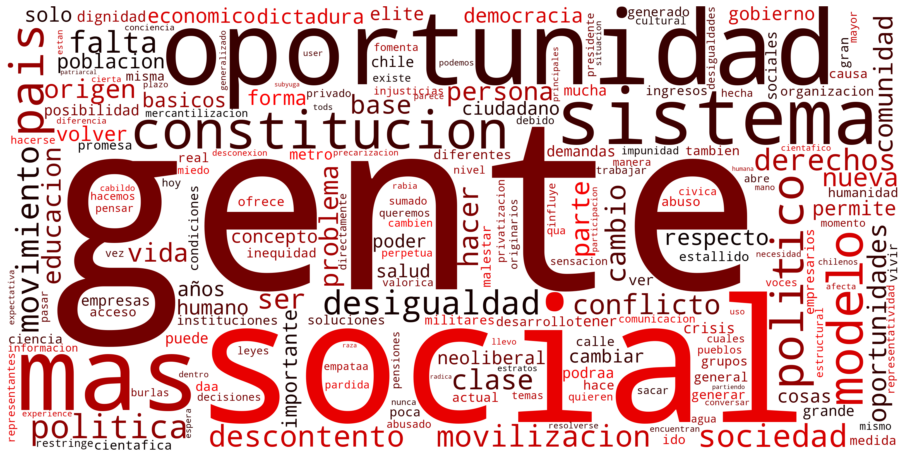

In [20]:
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
#colors = ["#BF0A30", "#002868"]
colors = ["black", "red"]

cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wordcloud = WordCloud(width=3200, height=1600,collocations=False,background_color="white", colormap=cmap)

wordcloud.generate(wordCloudCorpusP1)

wordcloud.to_file("P1.png")

# Display the generated image:
#plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
wordCloudCorpusP2 = wordCloudCorpusP2.replace('paas', 'pais')
wordCloudCorpusP2 = wordCloudCorpusP2.replace('constitucional', 'constituyente')
wordCloudCorpusP2 = wordCloudCorpusP2.replace('polatica', 'politica')
wordCloudCorpusP2 = wordCloudCorpusP2.replace('constitucion', '')
wordCloudCorpusP2 = wordCloudCorpusP2.replace('cambiar', 'cambio')

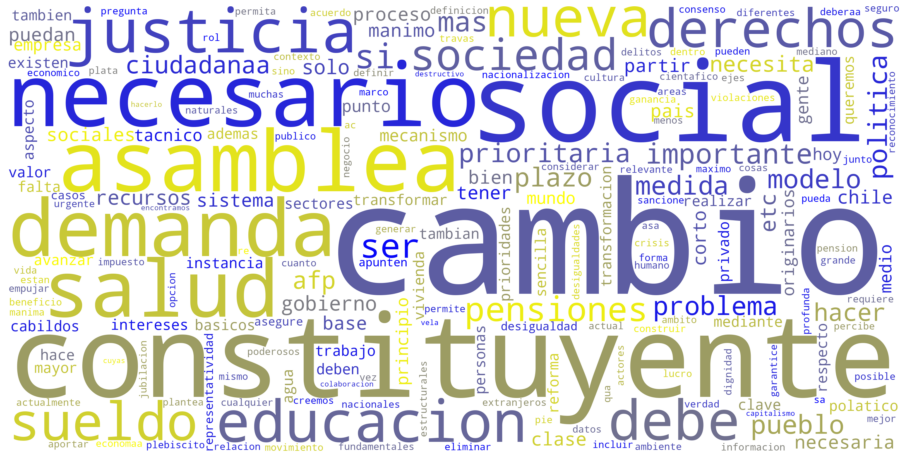

In [22]:
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
#colors = ["#BF0A30", "#002868"]
colors = ["yellow", "Blue"]

cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wordcloud = WordCloud(width=3200, height=1600,collocations=False,background_color="white", colormap=cmap)

wordcloud.generate(wordCloudCorpusP2)

wordcloud.to_file("P2.png")

# Display the generated image:
#plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
wordCloudCorpusP3 = wordCloudCorpusP3.replace('cientafico', 'cientifico')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('cientifica', 'cientifico')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('cientafica', 'cientifico')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('cientifico', '')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('modelo', '')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('ciencia', '')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('polatica', 'politica')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('polatico', 'politica')
wordCloudCorpusP3 = wordCloudCorpusP3.replace('paas', 'pais')

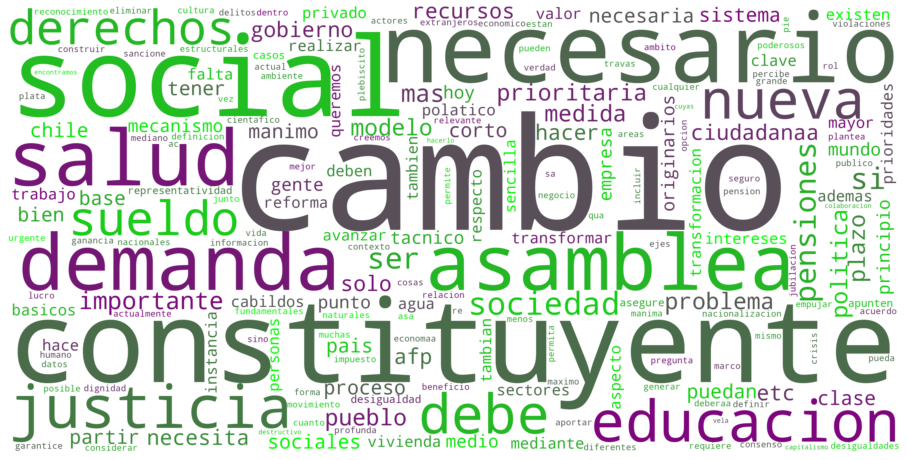

In [27]:
from wordcloud import WordCloud

from matplotlib.colors import LinearSegmentedColormap
#colors = ["#BF0A30", "#002868"]
colors = ["lime", "purple"]


cmap = LinearSegmentedColormap.from_list("mycmap", colors)

#wordcloud = WordCloud(width=3200, height=1600,collocations=False,background_color="white", colormap=matplotlib.cm.magma)
wordcloud = WordCloud(width=3200, height=1600,collocations=False,background_color="white", colormap=cmap)

wordcloud.generate(wordCloudCorpusP2)

wordcloud.to_file("P2.png")

# Display the generated image:
#plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ayuda para hacer nubes de palabras: https://mubaris.com/posts/dataviz-wordcloud/